In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
#read in the data
weather = pd.read_csv("Data-Weather.csv", low_memory=False)
weather = weather.sample(n=1000)
weather=weather.dropna()

<AxesSubplot:>

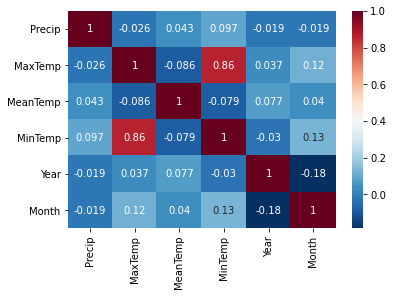

In [3]:
#Make a heatmap
seabornInstance.heatmap(weather.corr(), annot=True, cmap = 'RdBu_r')

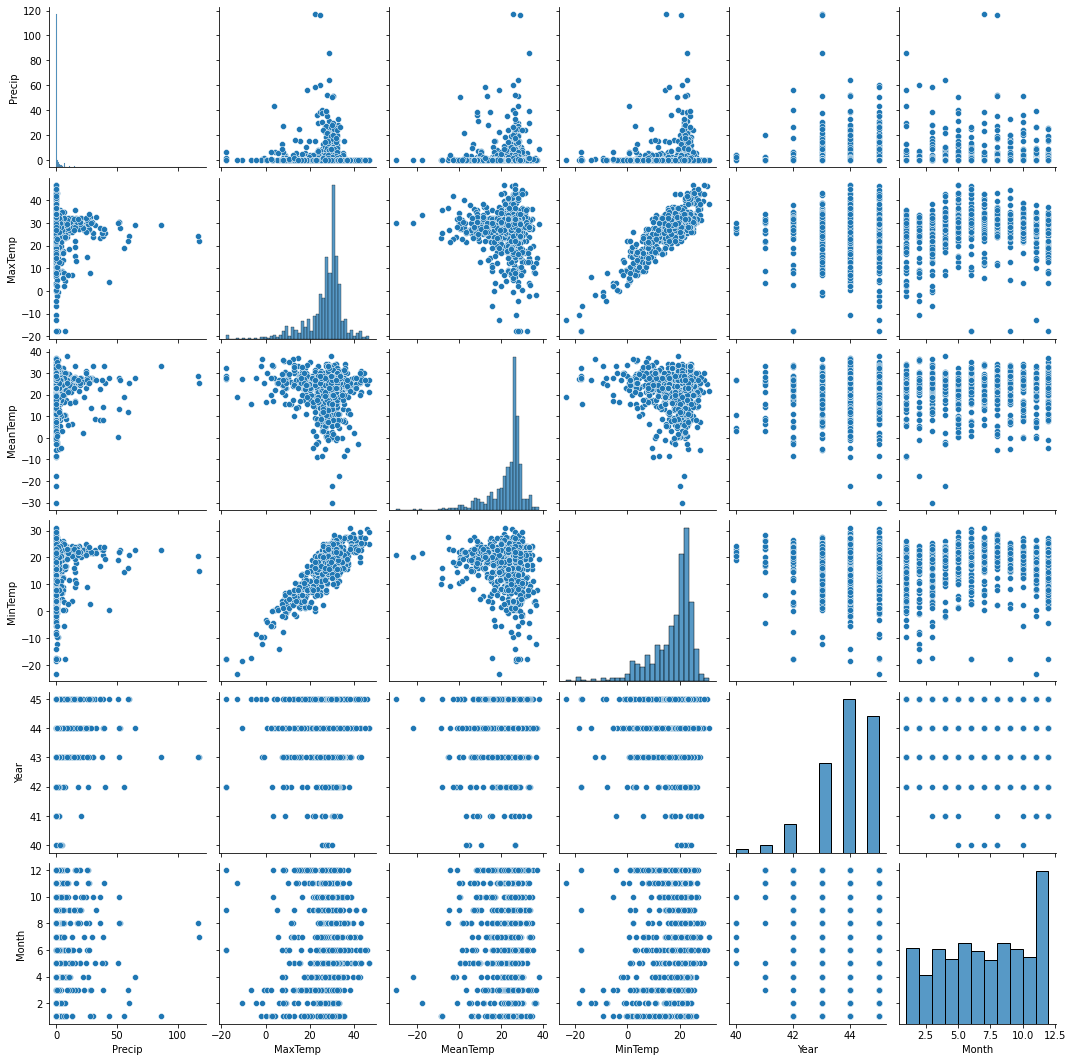

In [4]:
#This scatterplot matrix is also useful
seabornInstance.pairplot(weather)

In [5]:
#Simple linear regression
x = weather['MaxTemp'].values.reshape(-1,1)
y = weather['MinTemp'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25)
SLR = LinearRegression()
SLR.fit(x_train, y_train)

print("MinTemp = " + str(round(SLR.intercept_[0], 2)) + " + " + str(round(SLR.coef_[0][0], 2)) + "(MaxTemp)")
y_predicted = SLR.predict(x_test)


MinTemp = -4.7 + 0.82(MaxTemp)


In [6]:
#Let's check some evaluation metrics
#RMSE
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print("RMSE: " + (str(round(RMSE, 2))))
print()

#Value range of the independent variable (calories)
print("MinTemp max: " + str(weather['MinTemp'].max()))
print("MinTemp min: " + str(weather['MinTemp'].min()))
print("MinTemp range: " + str(weather['MinTemp'].max() - weather['MinTemp'].min()))
print()

#R^2
print("R-squared: " + str(round(SLR.score(x,y), 2)))

RMSE: 4.25

MinTemp max: 31.11111111
MinTemp min: -23.33333333
MinTemp range: 54.44444444

R-squared: 0.75


In [7]:
X2 = weather['MaxTemp']
y2 = weather['MinTemp']

X3 = sm.add_constant(X2)
est = sm.OLS(y2, X3)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                MinTemp   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     2400.
Date:                Tue, 02 Mar 2021   Prob (F-statistic):          3.95e-244
Time:                        12:46:02   Log-Likelihood:                -2278.3
No. Observations:                 810   AIC:                             4561.
Df Residuals:                     808   BIC:                             4570.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5625      0.472     -9.668      0.0

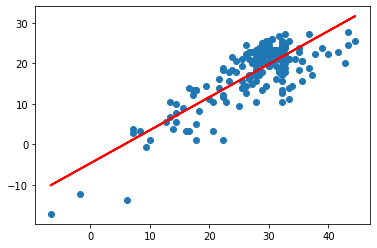

In [8]:
#Graph the simple linear regression
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predicted, color='red', linewidth=2)
plt.show()


In [9]:
#Multiple linear regression
#Let's check out this new function in the new statsmodel module
MLR = smf.ols('MinTemp ~ MaxTemp', data=weather).fit()
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MinTemp   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     2400.
Date:                Tue, 02 Mar 2021   Prob (F-statistic):          3.95e-244
Time:                        12:46:02   Log-Likelihood:                -2278.3
No. Observations:                 810   AIC:                             4561.
Df Residuals:                     808   BIC:                             4570.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5625      0.472     -9.668      0.000      -5.489      -3.636
MaxTemp        0.8146      0.017     48.988      0.000       0.782       0.847
==============================================================================
Omnibus:                       58.039   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.121
Skew:                          -0.711   Prob(JB):                     9.78e-16
Kurtosis:                       3.166   Cond. No.                         94.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#Will adding a variable improve our evaluation metrics?
MLR = smf.ols('MinTemp ~ MaxTemp + Precip', data=weather).fit()
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MinTemp   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1296.
Date:                Tue, 02 Mar 2021   Prob (F-statistic):          1.00e-252
Time:                        12:46:03   Log-Likelihood:                -2254.3
No. Observations:                 810   AIC:                             4515.
Df Residuals:                     807   BIC:                             4529.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9812      0.462    -10.775      0.000      -5.889      -4.074
MaxTemp        0.8176      0.016     50.598      0.000       0.786       0.849
Precip         0.0914      0.013      7.019      0.000       0.066       0.117
==============================================================================
Omnibus:                       52.434   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.179
Skew:                          -0.666   Prob(JB):                     5.19e-14
Kurtosis:                       3.189   Cond. No.                         96.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

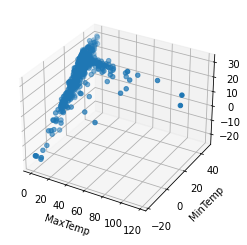

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(weather['Precip'], weather['MaxTemp'], weather['MinTemp'])
plt.xlabel('MaxTemp')
plt.ylabel('MinTemp')
plt.show()

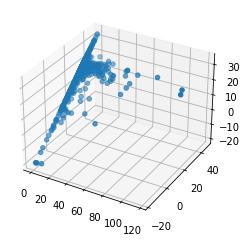

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(weather['Precip'], weather['MaxTemp'], MLR.fittedvalues)
#ax.view_init(45, 45)
plt.show()

In [13]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('R-squared Score:', SLR.score(x, y))


Root Mean Squared Error: 4.245107221707377
R-squared Score: 0.7480788520226183
